<a href="https://colab.research.google.com/github/nik299/IndiaMart-Hackathon-2k19/blob/master/phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.signal import argrelextrema
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
drilldf = pd.read_csv('./phaseone-drill.csv')
glovedf = pd.read_csv('./phaseone-gloves.csv')
kurtadf = pd.read_csv('./phaseone-kurta.csv')

In [79]:
drilldf.head()

,Category Name,Unit,Price
0,Impact Drill,Piece,2
1,Impact Drill,Piece,675
2,Impact Drill,Piece,766
3,Impact Drill,Piece,900
4,Impact Drill,Piece,1000


In [80]:
glovedf.head()

,Category Name,Unit,Price
0,Leather Safety Gloves,Pair,10
1,Leather Safety Gloves,Pair,12
2,Leather Safety Gloves,Pair,12
3,Leather Safety Gloves,Pair,20
4,Leather Safety Gloves,Pair,23


In [81]:
kurtadf.head()

,Category Name,Unit,Price
0,Ladies Kurta,Piece,1
1,Ladies Kurta,Piece,1
2,Ladies Kurta,dollar,7
3,Ladies Kurta,Piece,20
4,Ladies Kurta,Piece,20


In [82]:
drill_units=drilldf['Unit'].unique()
print(drill_units,'drills')
glove_units=glovedf['Unit'].unique()
print(glove_units,'gloves')
kurta_units=kurtadf['Unit'].unique()
print(kurta_units,'kurtas')

['Piece' 'Piece(s)' 'pack' 'unit' 'Number' 'Unit' 'Pack' '1nos' 'Unit(s)'
 'kit' 'Set' 'Pc_Onwards' 'ONWARDS' 'Kit'] drills
['Pair' 'Piece' 'pack' 'Unit' 'Pack' 'Unit/Onwards' 'Pair(s)' 'unit' 'Set'
 'Pieces'] gloves
['Piece' 'dollar' 'Packet' 'piece' 'Meter' 'Piece(s)' 'Set' 'Per piece'
 'Unit' '1' '1pc' 'Box' '170 per peice' 'Unstitch' 'Barrel' 'Carton'
 'peice' 'Pieces' 'Sets' 'Unit(s)' 'one' 'Bag' 'Selfie Kurtis' 'Pack'
 'Pair' 'Pound' 'Peice' '1piece' 'No' 'Kilogram' 'Number' "40' Container"
 'pack' '100 pic' 'Year' "20' Container" 'Pcs' 'Piece(s) Onwards' 'One'
 'kurtI' 'Ounce' 'onwards' '10-10000' 'per piese' 'Day' 'Set(s)'
 '12 units' '1pis' 'Onwards' 'One peace' 'Set(S)' 'Pair piece' 'Ounce(s)'
 'Packet(s)' 'Single' 'one pcs' 'Pc' '4 pcs' '4 units' '5' 'set' 'kurti'
 'pcs' 'pices' 'Pics' 'single piece' 'pi' 'per piece' 'Kurti' 'one unit'
 '1 piece' '1 pice' 'Suit' 'pair piece' '10' 'pieces' '1pcs' '1 pc'
 '3 set' 'Xl size' '1000 per unit' '1pcd' 'Psc' 'Gram' 'Rs' 'in' '1 pcs'


In [83]:
drilldf['Unit'].value_counts()

Piece         119
pack           47
unit           25
Unit           17
Number         14
Pack            9
Pc_Onwards      5
Piece(s)        5
ONWARDS         1
Kit             1
Set             1
1nos            1
kit             1
Unit(s)         1
Name: Unit, dtype: int64

In [84]:
glovedf['Unit'].value_counts()

Pair            113
unit              9
Piece             6
pack              5
Unit              3
Pack              3
Pair(s)           2
Unit/Onwards      1
Pieces            1
Set               1
Name: Unit, dtype: int64

In [85]:
kurtadf['Unit'].value_counts()


Piece               3334
Piece(s)             500
1                     76
Unit                  63
Set                   43
Onwards               39
piece                 38
No                    37
Bag                   23
Number                23
Pair                  17
Pack                  13
Pieces                13
Unit(s)               11
Box                    9
onwards                9
20' Container          6
Set(s)                 5
40' Container          5
Ounce                  4
Packet                 4
1piece                 3
Meter                  3
one                    3
kurti                  3
Psc                    3
1pc                    3
peice                  3
One                    2
pieces                 2
                    ... 
170 per peice          1
pi                     1
100 pic                1
kurtI                  1
Suit                   1
onepices               1
Piece(s) Onwards       1
dollar                 1
pcs                    1


In [86]:
kurtadf.loc[((kurtadf['Unit']=='Piece') | (kurtadf['Unit']=='Piece(s)')) & (kurtadf['Price'] < 10000)]['Unit'].value_counts()

Piece       3323
Piece(s)     500
Name: Unit, dtype: int64

In [0]:
drill_z = np.abs(stats.zscore(drilldf['Price']))
glove_z = np.abs(stats.zscore(glovedf.loc[glovedf['Unit']=='Pair']['Price']))
kurta_z = np.abs(stats.zscore(kurtadf.loc[((kurtadf['Unit']=='Piece') | (kurtadf['Unit']=='Piece(s)'))]['Price']))

In [0]:
drill_ol=drilldf[(drill_z < 3)]
npa=drilldf[(drill_z < 3)]['Price']
npa1=glovedf.loc[glovedf['Unit']=='Pair'][(glove_z < 3)]['Price']
npa2=kurtadf.loc[((kurtadf['Unit']=='Piece') | (kurtadf['Unit']=='Piece(s)'))][(kurta_z < 3)]['Price'][:-1]

In [89]:
drilldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 3 columns):
Category Name    247 non-null object
Unit             247 non-null object
Price            247 non-null int64
dtypes: int64(1), object(2)
memory usage: 5.9+ KB


In [90]:
kurtadf.loc[((kurtadf['Unit']=='Piece') | (kurtadf['Unit']=='Piece(s)'))][(kurta_z < 3)].describe()

,Price
count,3821.000000
mean,696.981942
std,675.809564
min,1.000000
25%,325.000000
50%,500.000000
75%,800.000000
max,6589.000000


In [91]:
drilldf.describe()

,Price
count,247.000000
mean,6570.153846
std,9543.845737
min,2.000000
25%,2107.500000
50%,3098.000000
75%,6020.000000
max,55000.000000


In [92]:
drill_ol.describe()

,Price
count,238.000000
mean,5106.016807
std,5777.683116
min,2.000000
25%,2100.000000
50%,2954.000000
75%,5638.500000
max,35000.000000


In [93]:
stdev=np.std(npa)
stdev1=np.std(npa1)
stdev2=np.std(npa2)
print(stdev,stdev1,stdev2)

5765.5323498379985 64.60411168657322 669.0502683105965


In [94]:
print(np.amin(npa),np.amax(npa))
print(np.amin(npa1),np.amax(npa1))
print(np.amin(npa2),np.amax(npa2))

2 35000
10 250
1 6500


In [0]:
from scipy.stats import gaussian_kde
def kde_scipy(x, x_grid, bandwidth, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

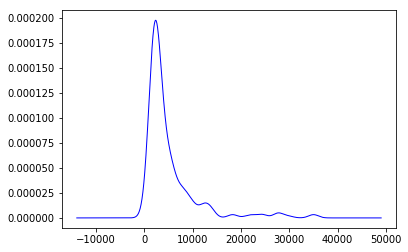

In [96]:
y_grid=np.linspace(np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4,np.amax(npa)+(np.amax(npa)-np.amin(npa))*0.4,1000)
ideal=1.06*(np.std(npa))*((len(npa)**(-1/5)))
pdf = kde_scipy(npa, y_grid, bandwidth=ideal/2)
plt.plot(y_grid, pdf, color='blue', alpha=1, lw=1)

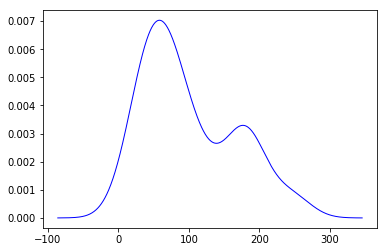

In [97]:
y_grid1=np.linspace(np.amin(npa1)-(np.amax(npa1)-np.amin(npa1))*0.4,np.amax(npa1)+(np.amax(npa1)-np.amin(npa1))*0.4,1000)
ideal1=1.06*(np.std(npa1))*((len(npa1)**(-1/5)))
pdf1 = kde_scipy(npa1, y_grid1, bandwidth=ideal1)
plt.plot(y_grid1, pdf1, color='blue', alpha=1, lw=1)

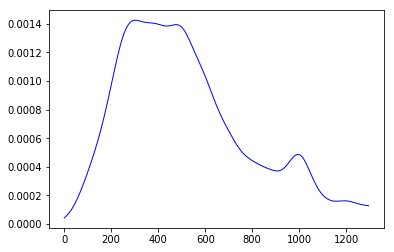

In [98]:
y_grid2=np.linspace(0,np.amax(npa2),1000)
ideal2=1.06*(np.std(npa2))*((len(npa2)**(-1/5)))
pdf2 = kde_scipy(npa2, y_grid2, bandwidth=ideal1*1.8)
plt.plot(y_grid2[:200], pdf2[:200], color='blue', alpha=1, lw=1)

In [99]:
w=((np.amax(npa)-np.amin(npa))*1.8)/1000
w1=((np.amax(npa1)-np.amin(npa1))*1.8)/1000
w2=np.amax(npa2)/1000
print(np.sum(pdf)*w,np.sum(pdf1)*w1,np.sum(pdf2)*w2)

0.9990000000000001 0.9989895031714772 0.9977002791121322


In [100]:
pdf_area=np.zeros(len(pdf)-1)
for a in range(len(pdf_area)):
  pdf_area[a]=(pdf[a]+pdf[a+1])*(w/2)
print(np.sum(pdf_area))

0.9990000000000003


In [101]:
f_peak=argrelextrema(pdf, np.greater)[0][0]
for q in range(f_peak):
  if np.sum(pdf[f_peak-q:f_peak+q])*w > 0.5:
    print(np.sum(pdf[f_peak-q:f_peak+q])*w,q)
    break
print((f_peak-q)*w+np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4,(f_peak+q)*w+np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4)

0.5011425457051477 24
806.9539999999997 3830.7812000000013


In [102]:
f_peak1=argrelextrema(pdf1, np.greater)[0][0]
q=0
for q in range(f_peak1):
  if np.sum(pdf1[f_peak1-q:f_peak1+2*q])*w1 > 0.5:
    print(np.sum(pdf1[f_peak1-q:f_peak1+2*q])*w1,q)
    break
print((f_peak1-q)*w1,(f_peak1+2*q)*w1)

0.5026509161057199 67
115.344 202.176


In [103]:
f_peak2=argrelextrema(pdf2, np.greater)[0][0]
for q in range(f_peak2):
  if np.sum(pdf2[f_peak2-q:f_peak2+q])*w2 > 0.6:
    print(np.sum(pdf2[f_peak2-q:f_peak2+q])*w2,q)
    break
print((f_peak2-q)*w2+np.amin(npa2),(f_peak2+q)*w2+np.amin(npa2))

0.6037672753033876 45
14.0 599.0


In [104]:
qq1=len(pdf)
for q in range(len(pdf)):
  for p in range(len(pdf)-(q+1)):
     if np.sum(pdf[p:p+q+1])*w > 0.5:
        print(np.sum(pdf[p:p+q+1])*w,p,q)
        break
  if np.sum(pdf[p:p+q+1])*w > 0.5:
    print(np.sum(pdf[p:p+q+1])*w,p,q)
    break
print((p)*w+np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4,(p+q+1)*w+np.amin(npa)-(np.amax(npa)-np.amin(npa))*0.4)  
     
        

0.5011425457051477 235 47
0.5011425457051477 235 47
806.9539999999997 3830.7812000000013


In [105]:
qq2=len(pdf1)
for q in range(len(pdf1)):
  for p in range(len(pdf1)-(q+1)):
     if np.sum(pdf1[p:p+q+1])*w1 > 0.5:
        print(np.sum(pdf1[p:p+q+1])*w1,p,q)
        break
  if np.sum(pdf1[p:p+q+1])*w1 > 0.5:
    print(np.sum(pdf1[p:p+q+1])*w1,p,q)
    break
print((p)*w1+np.amin(npa1)-(np.amax(npa1)-np.amin(npa1))*0.4,(p+q+1)*w1+np.amin(npa1)-(np.amax(npa1)-np.amin(npa1))*0.4)  
 

0.5000234198382558 237 193
0.5000234198382558 237 193
16.384 100.19200000000001


In [106]:
qq3=len(pdf2)
for q in range(len(pdf2)):
  for p in range(len(pdf2)-(q+1)):
     if np.sum(pdf2[p:p+q+1])*w2 > 0.6:
        print(np.sum(pdf2[p:p+q+1])*w2,p,q)
        break
  if np.sum(pdf2[p:p+q+1])*w2 > 0.6:
    print(np.sum(pdf2[p:p+q+1])*w2,p,q)
    break
print((p)*w2+np.amin(npa2),(p+q+1)*w2+np.amin(npa2))

0.6000918485533974 25 73
0.6000918485533974 25 73
163.5 644.5


In [107]:
aqw=np.zeros(6)
aqw[1:2]

array([0.])

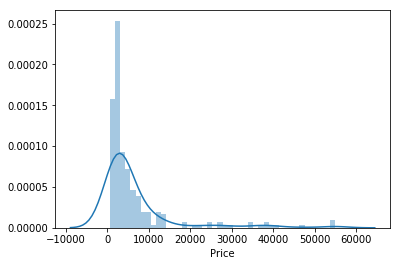

In [108]:
sns.distplot(drilldf['Price'][1:]);

In [109]:
sns.distplot(df_train['Price'][1:], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['Price'][1:], plot=plt)

NameError: ignored

In [0]:
plt.scatter(drilldf['Price'],array);

In [0]:
array=np.arange(247)+1;array